In [2]:
import numpy as np
import matplotlib.pyplot as plt

class KMeans:
    def __init__(self, n_clusters=3, max_iters=100, tolerance=1e-4):
        self.n_clusters = n_clusters
        self.max_iters = max_iters
        self.tolerance = tolerance
        self.centroids = None

    def fit(self, data):
        indices = np.random.choice(len(data), self.n_clusters, replace=False)
        self.centroids = data[indices]

        for _ in range(self.max_iters):
            idices = self.predict(data)
            old_centroids = self.centroids.copy()
            for i in range(self.n_clusters):
                self.centroids[i] = np.mean(data[idices==i])

            if np.linalg.norm(self.centroids - old_centroids) < self.tolerance:
                break

        return self.centroids 

    def predict(self, data):
        distances = np.linalg.norm(np.expand_dims(data,1) - np.expand_dims(self.centroids,0), axis=2)
        return np.argmin(distances, 1)


    def plot_clusters(self, data):
        predicted_clusters = self.predict(data)

        fig, ax = plt.subplots()
        for i, point in enumerate(data):
            ax.scatter(point[0], point[1], c=['C'+str(predicted_clusters[i])])  

        centroids = np.array(self.centroids)
        ax.scatter(centroids[:, 0], centroids[:, 1], s=300, marker='x', c='red')  

        plt.show()




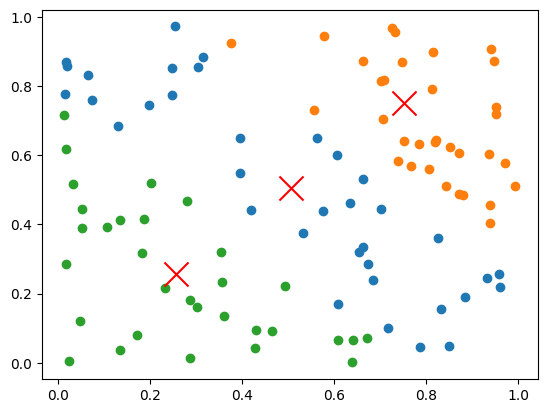

In [3]:
data = np.random.rand(100, 2)

kmeans = KMeans(n_clusters=3)
# centroids, clusters = kmeans.fit(data)  
centroids = kmeans.fit(data)  

# print("Centroids:")
# for centroid in centroids:
#     print(centroid)

kmeans.plot_clusters(data)

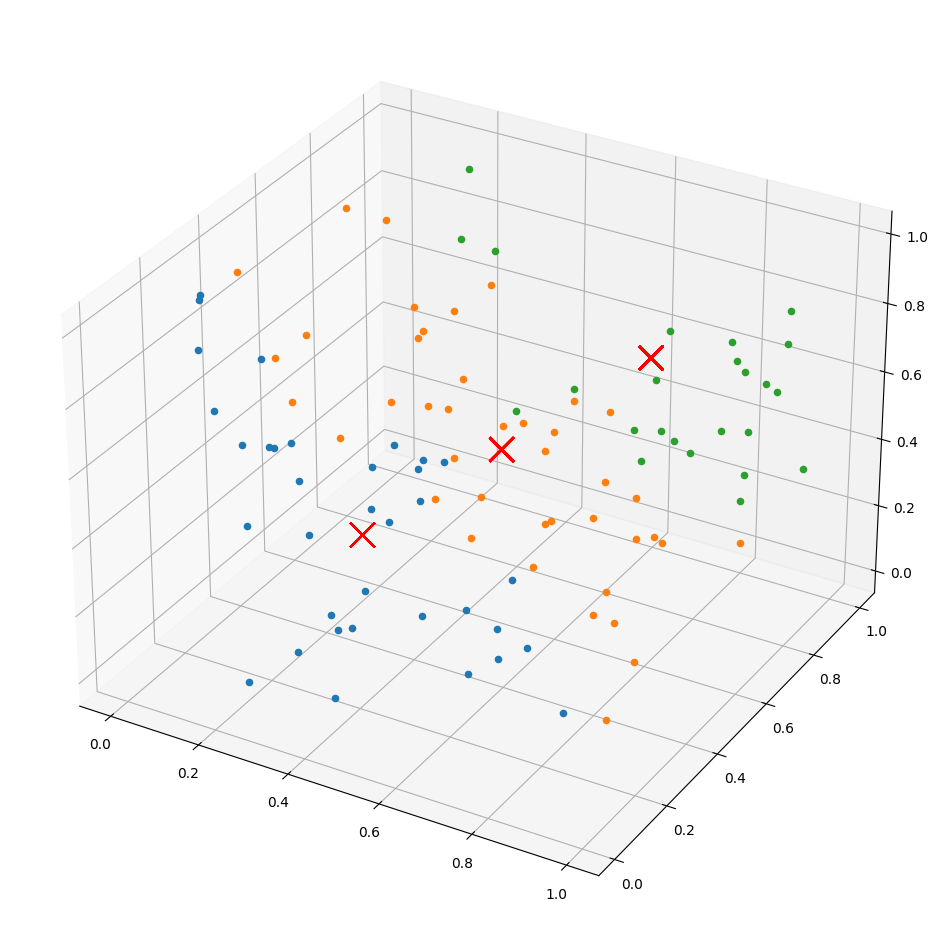

In [4]:
data = np.random.rand(100, 3)

kmeans = KMeans(n_clusters=3)
centroids = kmeans.fit(data)  

predicted_clusters = kmeans.predict(data)
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')
for i, point in enumerate(data):

    ax.scatter(point[0], point[1], point[2], c=['C'+str(predicted_clusters[i])])  # رنگ متفاوت برای هر خوشه

    centroids = np.array(kmeans.centroids)
    ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], s=300, marker='x', c='red')  # نشانگرهای بزرگ برای مراکز

### Image Compression

In [5]:
import cv2

image = cv2.imread('image.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
data = image.reshape([-1,1])

kmeans = KMeans(n_clusters=16)
centroids = kmeans.fit(data)  

c:\Users\kiano\.conda\envs\py38\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\kiano\.conda\envs\py38\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\kiano\AppData\Local\Temp\ipykernel_14904\4159836571.py:19: RuntimeWarning: invalid value encountered in cast
  self.centroids[i] = np.mean(data[idices==i])


In [6]:
index = kmeans.predict(data)
data2 = np.zeros(data.shape)
for i in range(data.size):
    for j in range(centroids.size):
        if index[i]==j:
            data2[i] = centroids[j]


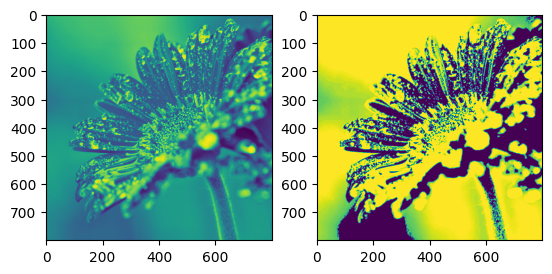

In [7]:
plt.subplot(1,2,1)
plt.imshow(data.reshape([800,800]))
plt.subplot(1,2,2)
plt.imshow(data2.reshape([800,800]))
plt.imsave('compressed.png',data2)

In [8]:
# cv2.imshow('hey.png',data2.reshape([800,800]))
cv2.imwrite('hey.png', data2.reshape([800,800])) 

True